In [2]:
import cv2
import argparse
import numpy as np
import scipy.stats
import polars as pl
from glob import glob
from pathlib import Path
from skimage.feature import local_binary_pattern
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy
from utils.prep import read_image
import matplotlib.pyplot as plt

In [3]:
def extract_mask(img):
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    l = lab[:, :, 0] / 255
    rb_mask = img[:, :, 0] > img[:, :, 2]
    bg_l = scipy.stats.mode(l.reshape(-1)).mode
    cont_mask = (np.abs(l - bg_l) / bg_l) 
    dab_cont_mask = cont_mask * rb_mask
    h_cont_mask = cont_mask * (~rb_mask)
    return dab_cont_mask, h_cont_mask


In [4]:
path = "../Data_Chula/HER2 2+ DISH+ case 02/IMG_8210.HEIC"
img = read_image(path)
cont_mask, h_cont_mask = extract_mask(img)
h, w = cont_mask.shape

min_cont = 0.05
level = 32 - 1

# calculate q_gray
q_gray = np.zeros(cont_mask.shape).astype(np.uint8)
d = (1 - min_cont) / level
ths = np.arange(min_cont, 1. + d, d)
for i in range(len(ths[:-1])):
    v = i + 1
    th1 = ths[i]
    th2 = ths[i+1]
    level_mask = (cont_mask >= th1) & (cont_mask < th2)
    q_gray += (level_mask * v).astype(np.uint8)

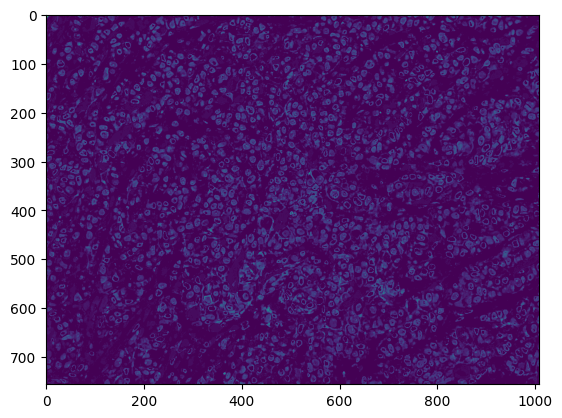

In [5]:
plt.imshow(q_gray)

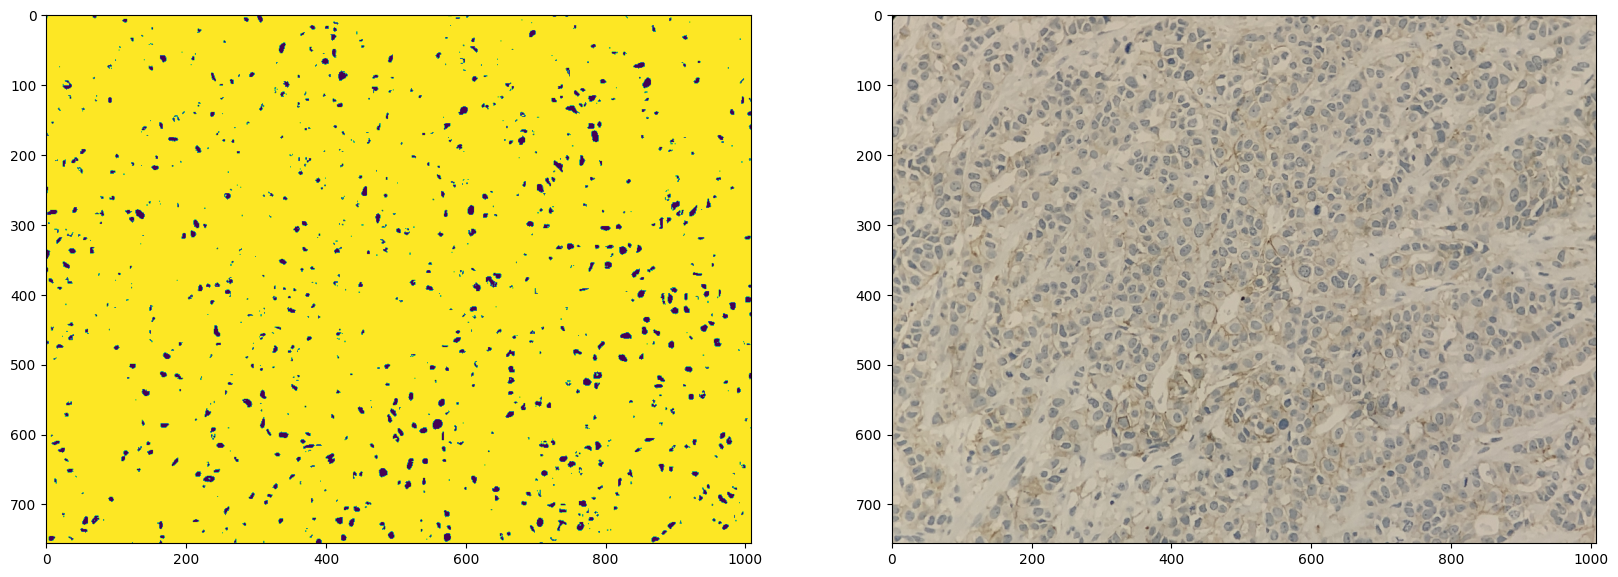

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
axs[0].imshow(img[:,:,0] > img[:,:,2])
axs[1].imshow(img)
